In [ ]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import matplotlib
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import array
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

In [ ]:
df = pd.read_csv('/content/PRSA_Data_Gucheng.csv')

df = df.drop(['No','station'],axis = 1)

#Changing the column names
cnames = list(df.columns)

#Drop the first row 
#df = df[24:]

df.dtypes

df.reset_index(inplace = True)
df = df.drop(['index'], axis = 1)

df_new = df[['year', 'month', 'day', 'hour']]
df_new['date'] = pd.to_datetime(df_new)

df['date'] = df_new['date']

#Set the date as Index
df = df.set_index(df['date'],drop = False)
df = df.sort_index()

# df_cbwd = df['cbwd']
# df_cbwd['cbwd_mode'] = df_cbwd.resample("d").apply(lambda x: stats.mode(x)[0])

# df = df.resample('d').mean()
# df['cbwd'] = df_cbwd['cbwd_mode']

df['day_of_week'] = df.index.dayofweek

def weekend(row):
    if (row == 5) or (row == 6):
        return 1
    else:
        return 0

df['weekend'] = df['day_of_week'].apply(weekend)


mean = df['PM10'].min()
std_dev = df['PM10'].max() - df['PM10'].min()

for field in cnames:
    print(field, df[field].isna().sum())

df['PM10'] = df['PM10'].fillna(df['PM10'].mean())

df = pd.get_dummies(df, columns = ['wd'] )    

#df['PM10'] = df['PM10']
#df = df.drop(['PM10'], axis = 1)

df = df.drop(['hour', 'date'], axis = 1)

cnames = list(df.columns)

year 0
month 0
day 0
hour 0
PM2.5 646
PM10 381
SO2 507
NO2 668
CO 1401
O3 729
TEMP 51
PRES 50
DEWP 51
RAIN 43
wd 159
WSPM 42


In [ ]:
print(cnames)

['year', 'month', 'day', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'day_of_week', 'weekend', 'wd_E', 'wd_ENE', 'wd_ESE', 'wd_N', 'wd_NE', 'wd_NNE', 'wd_NNW', 'wd_NW', 'wd_S', 'wd_SE', 'wd_SSE', 'wd_SSW', 'wd_SW', 'wd_W', 'wd_WNW', 'wd_WSW']


In [ ]:
for field in cnames:
  df[field] = df[field].fillna(df[field].mean())

In [ ]:
for field in cnames:
    print(field, df[field].isna().sum())

year 0
month 0
day 0
PM2.5 0
PM10 0
SO2 0
NO2 0
CO 0
O3 0
TEMP 0
PRES 0
DEWP 0
RAIN 0
WSPM 0
day_of_week 0
weekend 0
wd_E 0
wd_ENE 0
wd_ESE 0
wd_N 0
wd_NE 0
wd_NNE 0
wd_NNW 0
wd_NW 0
wd_S 0
wd_SE 0
wd_SSE 0
wd_SSW 0
wd_SW 0
wd_W 0
wd_WNW 0
wd_WSW 0


In [ ]:
df.head()

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,6.0,18.0,5.000000,55.871075,800.000000,88.000000,0.1,1021.1,-18.6,0.0,4.4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2013-03-01 01:00:00,2013,3,1,6.0,15.0,5.000000,55.871075,800.000000,88.000000,-0.3,1021.5,-19.0,0.0,4.0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2013-03-01 02:00:00,2013,3,1,5.0,18.0,15.366162,55.871075,700.000000,52.000000,-0.7,1021.5,-19.8,0.0,4.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-03-01 03:00:00,2013,3,1,6.0,20.0,6.000000,55.871075,1323.974423,57.694879,-1.0,1022.7,-21.2,0.0,2.8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2013-03-01 04:00:00,2013,3,1,5.0,17.0,5.000000,55.871075,600.000000,73.000000,-1.3,1023.0,-21.4,0.0,3.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df['pm10'] = df['PM10']
df = df.drop('PM10', axis = 1)
df['PM10'] = df['pm10']
df = df.drop('pm10', axis = 1)
df.head()

,year,month,day,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,PM10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,6.0,5.000000,55.871075,800.000000,88.000000,0.1,1021.1,-18.6,0.0,4.4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,18.0
2013-03-01 01:00:00,2013,3,1,6.0,5.000000,55.871075,800.000000,88.000000,-0.3,1021.5,-19.0,0.0,4.0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,15.0
2013-03-01 02:00:00,2013,3,1,5.0,15.366162,55.871075,700.000000,52.000000,-0.7,1021.5,-19.8,0.0,4.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,18.0
2013-03-01 03:00:00,2013,3,1,6.0,6.000000,55.871075,1323.974423,57.694879,-1.0,1022.7,-21.2,0.0,2.8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,20.0
2013-03-01 04:00:00,2013,3,1,5.0,5.000000,55.871075,600.000000,73.000000,-1.3,1023.0,-21.4,0.0,3.6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,17.0


In [ ]:
df = df.resample('d').mean()

In [ ]:
df.head()

,year,month,day,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,PM10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01,2013,3,1,8.625000,7.723590,48.934229,888.498934,76.320620,1.691667,1024.816667,-19.691667,0.0,2.350000,4,0,0.166667,0.333333,0.083333,0.000000,0.125000,0.000000,0.000000,0.083333,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.125000,0.000000,16.875000
2013-03-02,2013,3,2,36.916667,37.291667,38.327961,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500,5,1,0.125000,0.208333,0.041667,0.000000,0.041667,0.041667,0.041667,0.041667,0.083333,0.041667,0.166667,0.083333,0.083333,0.000000,0.000000,0.000000,51.375000
2013-03-03,2013,3,3,80.333333,47.541667,62.400551,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000,6,1,0.041667,0.000000,0.041667,0.041667,0.041667,0.000000,0.041667,0.083333,0.000000,0.083333,0.083333,0.041667,0.083333,0.041667,0.375000,0.000000,120.041667
2013-03-04,2013,3,4,26.500000,18.666667,44.268871,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667,0,0,0.083333,0.000000,0.083333,0.083333,0.041667,0.041667,0.000000,0.000000,0.041667,0.041667,0.083333,0.083333,0.041667,0.166667,0.166667,0.041667,51.291667
2013-03-05,2013,3,5,136.708333,72.640257,63.216460,1376.747869,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667,1,0,0.083333,0.041667,0.041667,0.041667,0.125000,0.000000,0.083333,0.041667,0.000000,0.250000,0.000000,0.000000,0.000000,0.125000,0.166667,0.000000,172.541667


In [ ]:
df = df.iloc[:-4,:]

In [ ]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

for field in cnames:
    df[field] = (df[field] - df[field].min())/(df[field].max() - df[field].min())

# choose a number of time steps
n_steps_in, n_steps_out = 15, 4

X, y = split_sequences(df.values, n_steps_in, n_steps_out)

X_test, y_test = X[-1], y[-1]

for i in range(n_steps_out):
	X = np.delete(X, X.shape[0] - 1, 0)
	y = np.delete(y, y.shape[0] - 1, 0)

n_features = X.shape[2]


In [ ]:
df.head()

,year,month,day,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,weekend,wd_E,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,PM10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01,0.0,0.181818,0.000000,0.006399,0.052133,0.241420,0.084255,0.412797,0.345057,0.769810,0.207441,0.0,0.310202,0.666667,0.0,0.500,0.888889,0.250,0.000000,0.166667,0.000000,0.000000,0.083333,0.000000,0.000000,0.125,0.000000,0.000000,0.066667,0.214286,0.000,0.018881
2013-03-02,0.0,0.181818,0.033333,0.061396,0.303177,0.183686,0.151721,0.208748,0.326257,0.771501,0.265706,0.0,0.130486,0.833333,1.0,0.375,0.555556,0.125,0.000000,0.055556,0.052632,0.071429,0.041667,0.117647,0.076923,0.500,0.117647,0.181818,0.000000,0.000000,0.000,0.080672
2013-03-03,0.0,0.181818,0.066667,0.145796,0.390203,0.314723,0.251190,0.176117,0.450211,0.521184,0.341199,0.0,0.174970,1.000000,1.0,0.125,0.000000,0.125,0.055556,0.055556,0.000000,0.071429,0.083333,0.000000,0.153846,0.250,0.058824,0.181818,0.066667,0.642857,0.000,0.203657
2013-03-04,0.0,0.181818,0.100000,0.041147,0.145044,0.216025,0.116491,0.362416,0.520014,0.582918,0.341995,0.0,0.195136,0.000000,0.0,0.250,0.000000,0.250,0.111111,0.055556,0.052632,0.000000,0.000000,0.058824,0.076923,0.250,0.117647,0.090909,0.266667,0.285714,0.125,0.080522
2013-03-05,0.0,0.181818,0.133333,0.255386,0.603299,0.319164,0.140035,0.457533,0.454259,0.446427,0.415026,0.0,0.095492,0.166667,0.0,0.250,0.111111,0.125,0.055556,0.166667,0.000000,0.142857,0.041667,0.000000,0.461538,0.000,0.000000,0.000000,0.200000,0.285714,0.000,0.297687


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mae')

print('SUCCESS!!')

Using TensorFlow backend.


SUCCESS!!


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=50, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(X, y, callbacks=[monitor], verbose=2, epochs=1000)

#from sklearn.externals import joblib 
#path = "/content/drive/My Drive/Journal_models/model_lstm_50back.pkl"  
# Save the model as a pickle in a file 
#joblib.dump(model, path) 

# # fit model
# model.fit(X, y, epochs=2000, verbose=2)

Epoch 1/1000
 - 1s - loss: 0.1014
Epoch 2/1000
 - 0s - loss: 0.0951
Epoch 3/1000
 - 0s - loss: 0.0925
Epoch 4/1000
 - 0s - loss: 0.0875
Epoch 5/1000
 - 0s - loss: 0.0838
Epoch 6/1000
 - 0s - loss: 0.0813
Epoch 7/1000
 - 0s - loss: 0.0751
Epoch 8/1000
 - 0s - loss: 0.0730
Epoch 9/1000
 - 0s - loss: 0.0687
Epoch 10/1000
 - 0s - loss: 0.0669
Epoch 11/1000
 - 0s - loss: 0.0658
Epoch 12/1000
 - 0s - loss: 0.0634
Epoch 13/1000
 - 0s - loss: 0.0605
Epoch 14/1000
 - 0s - loss: 0.0584
Epoch 15/1000
 - 0s - loss: 0.0581
Epoch 16/1000
 - 0s - loss: 0.0550
Epoch 17/1000
 - 0s - loss: 0.0544
Epoch 18/1000
 - 0s - loss: 0.0524
Epoch 19/1000
 - 0s - loss: 0.0517
Epoch 20/1000
 - 0s - loss: 0.0513
Epoch 21/1000
 - 0s - loss: 0.0507
Epoch 22/1000
 - 0s - loss: 0.0477
Epoch 23/1000
 - 0s - loss: 0.0461
Epoch 24/1000
 - 0s - loss: 0.0459
Epoch 25/1000
 - 0s - loss: 0.0436
Epoch 26/1000
 - 0s - loss: 0.0441
Epoch 27/1000
 - 0s - loss: 0.0428
Epoch 28/1000
 - 0s - loss: 0.0403
Epoch 29/1000
 - 0s - loss: 0

In [ ]:
x_input = array(X_test)
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=2)
print((yhat[0]*std_dev)+mean)
print((y_test*std_dev)+mean)

[129.2442  203.8463  109.05066 174.17853]
[164.26572099 143.77988776  61.52        84.32119403]


In [ ]:
y_test = (y_test*std_dev)+mean
yhat = (yhat[0]*std_dev)+mean
print(yhat)
print(y_test)

[129.2442  203.8463  109.05066 174.17853]
[164.26572099 143.77988776  61.52        84.32119403]


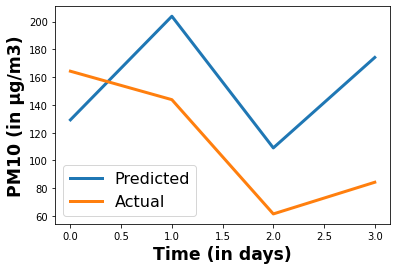

In [ ]:
plt.plot((yhat),label = 'Predicted', linewidth = 3)
plt.plot((y_test), label = 'Actual', linewidth = 3)
plt.xlabel('Time (in days)', fontsize = 'xx-large', fontweight = 'bold')
plt.ylabel('PM10 (in µg/m3)', fontsize = 'xx-large', fontweight = 'bold')
plt.legend(prop = {'size': 16})
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


rms_new = sqrt(mean_squared_error(y_test, yhat))
print(rms_new)

mse_new = mean_squared_error(y_test, yhat)
print(mse_new)

mae_new = mean_absolute_error(y_test, yhat)
print(mae_new)

mape_new = mean_absolute_percentage_error(y_test, yhat)
print(mape_new)

61.579185772867156
3791.9961204492847
58.1189806931913
61.73068029929174
